# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


The main aim of this case study is to understand the variables that affect the demand of shared bikes in the acquired data set.

## Reading and Understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

C:\Users\Rakshu\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# check for missing values
df.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


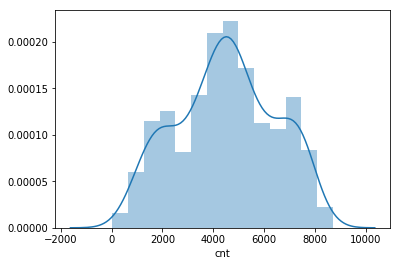

In [4]:
# Check if the data is normally distributed

sns.distplot(df['cnt'])
plt.show()

# it's negatively skewed.

## Exploratory Data Analysis


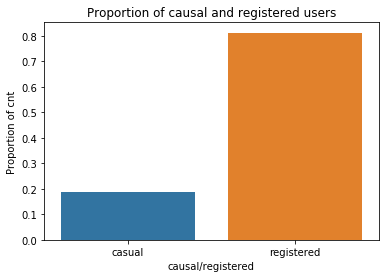

In [5]:
# distribution of the total bike rentals among registered and casual users
total_cnt = df['cnt'].sum()

casual_prop=df['casual'].sum()/total_cnt
registered_prop=df['registered'].sum()/total_cnt
sns.barplot(x=['casual','registered'],y=[casual_prop,registered_prop])
plt.title("Proportion of causal and registered users")
plt.xlabel("causal/registered")
plt.ylabel("Proportion of cnt")
plt.show()

# 80 % of user based that rent bikes are registered users

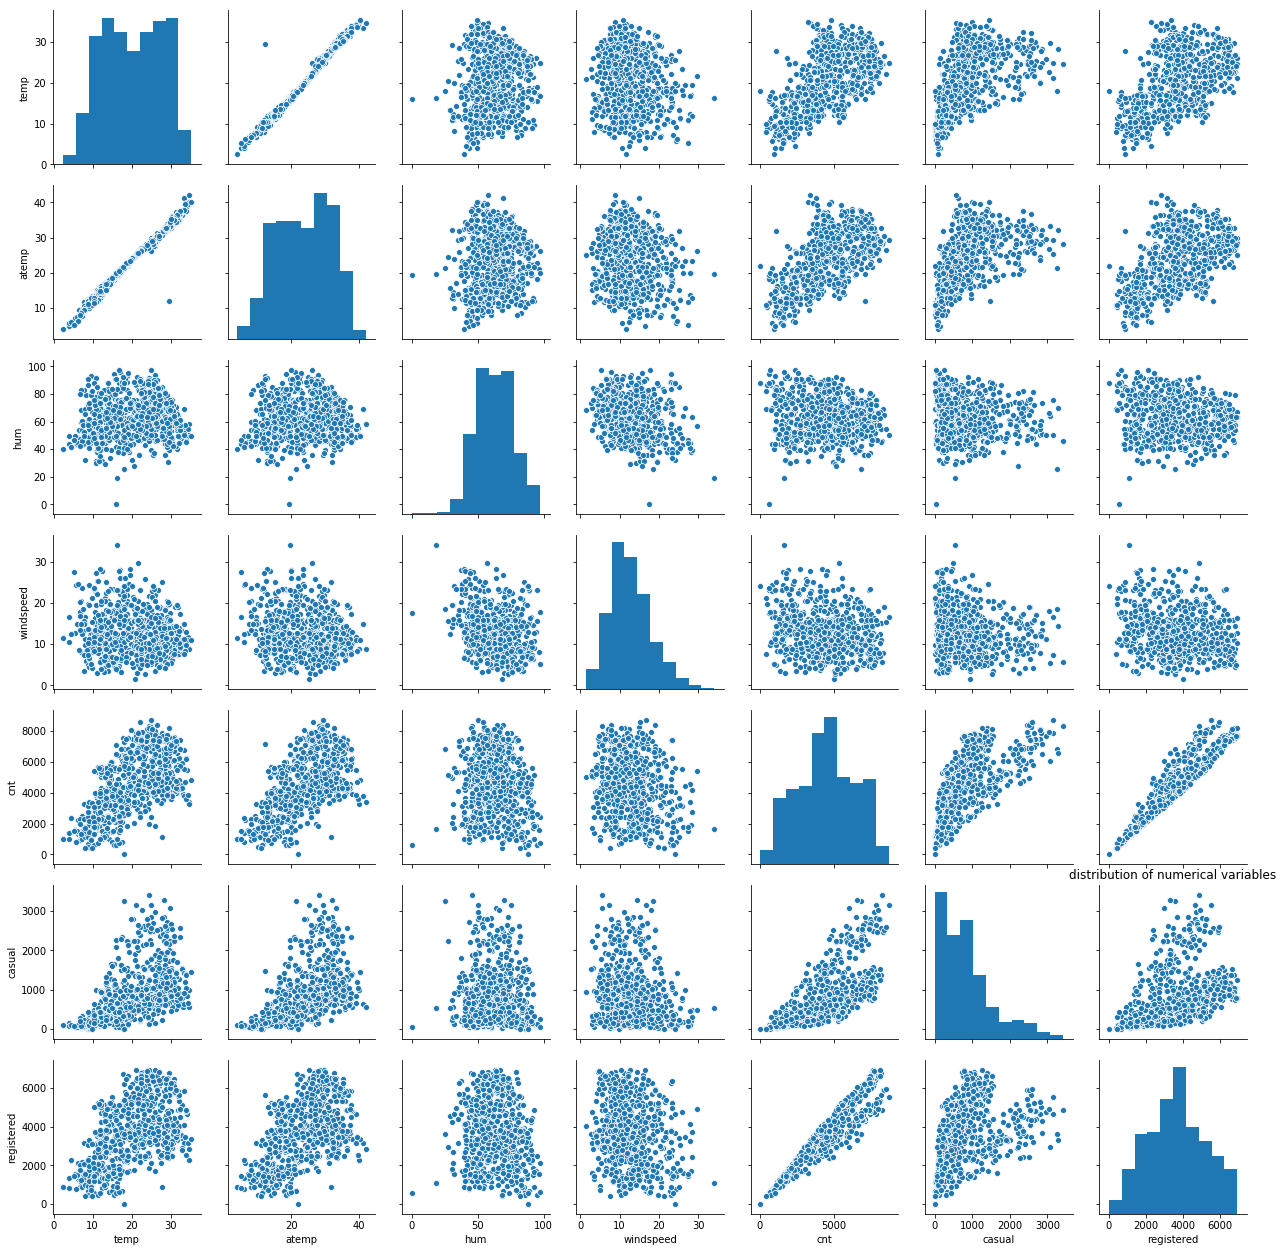

In [6]:
# visualising continous variables 
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt','casual','registered']])
plt.title("distribution of numerical variables")
plt.show()

# temp and cnt have linear relationship
#temp and atemp have linear relationship. One of these features should be removed
# registered has a linear relationship with cnt


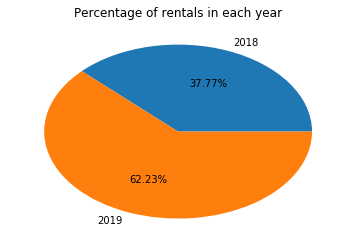

In [7]:
# percentage distribution of demands in each year
year_dist=df.groupby(by='yr')['cnt'].sum()/total_cnt
plt.pie(year_dist,labels=['2018','2019'],autopct = "%0.2f%%")
plt.title("Percentage of rentals in each year")
plt.show()
# 1,i.e 2019 has higher number of bike rentals than the year 2018 

In [8]:
# convert season to categorical
df['season']=df['season'].apply( lambda x:"spring" if x==1 else ("summer" if x==2 else ("fall" if x==3 else "winter")))
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

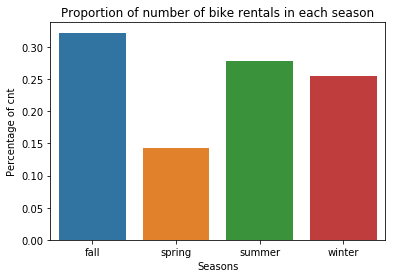

In [9]:
# percentage of demand in each season
total_cnt = df['cnt'].sum()
season_dist=(df[['season','cnt']].groupby(by='season').sum()/total_cnt)
sns.barplot(x=['fall','spring','summer','winter'],y= season_dist['cnt'])
plt.title("Proportion of number of bike rentals in each season")
plt.xlabel("Seasons")
plt.ylabel("Percentage of cnt")
plt.show()
# fall has the highest number of bike rentals , followed by summer,winter. Spring has the lowest demand

In [10]:
# connvert weathersit to categorical 
df['weathersit'].value_counts()

df['weathersit']=df['weathersit'].apply( lambda x:"clear" if x==1 else ("misty" if x==2 else ("light_rain" if x==3 else "heavy")))
df['weathersit'].value_counts()

clear         463
misty         246
light_rain     21
Name: weathersit, dtype: int64

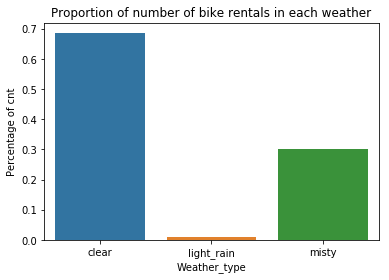

In [11]:
weather_dist=df.groupby(by='weathersit')['weathersit','cnt'].sum()/total_cnt
sns.barplot(x=['clear','light_rain','misty'],y= weather_dist['cnt'])
plt.title("Proportion of number of bike rentals in each weather")
plt.xlabel("Weather_type")
plt.ylabel("Percentage of cnt")
plt.show()


# clear weather , i.e following conditions have a higher demand for bike sharing Clear, Few clouds, Partly cloudy, Partly cloudy

In [12]:
# make month as categorical
import datetime
df['mnth_cat']=df['mnth'].apply(lambda x: datetime.datetime.strptime(str(x), "%m").strftime("%b"))

months_dist=df.groupby(by='mnth_cat')['mnth_cat','cnt'].sum()/total_cnt
months_dist.sort_values(by='cnt',ascending=False)

# june,july,aug and sept have high demands of bike sharing

,cnt
mnth_cat,
Aug,0.106718
Jun,0.105244
Sep,0.105137
Jul,0.104820
May,0.100791
Oct,0.097954
Apr,0.081770
Nov,0.077436
Mar,0.069563


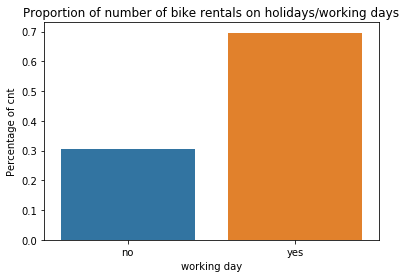

In [13]:
working_day_dist=df.groupby(by='workingday')['cnt'].sum()/total_cnt
sns.barplot(x=['no','yes'],y= working_day_dist)
plt.title("Proportion of number of bike rentals on holidays/working days")
plt.xlabel("working day")
plt.ylabel("Percentage of cnt")
plt.show()


# bike sharing has a higher demand on working days. This makes sense as it is used people to commute to work.

In [14]:
working_day_dist=df.groupby(by='workingday')['registered'].sum()/total_cnt
#plt.plot(working_day_dist)
#plt.show()
working_day_dist

## shared bikes are mostly used by registered users during the working days, this is probably their mode of commute to work.

workingday
0    0.207709
1    0.603904
Name: registered, dtype: float64

### Results from EDA 

- There is higher percentage of registered users who rent the bikes.
- Temp has a linear relationship with cnt.
- temp and atemp have linear relationship with each other.
- The number of bike rentals increases every year.
- The bike rentals are higher on good weather - clear,misty.
- The bike rentals are higher on working days.

## Data preparation

In [15]:
# create dummy variables from season
season_1 = pd.get_dummies(df['season'],drop_first=True)
df=pd.concat([df,season_1],axis=1)
# drop season column
df.drop('season',axis=1,inplace=True)

In [16]:
# create dummy variables
weather_1= pd.get_dummies(df['weathersit'],drop_first=True)
df = pd.concat([df,weather_1],axis=1)
df.drop('weathersit',axis=1,inplace=True)
df.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'mnth_cat', 'spring', 'summer', 'winter', 'light_rain', 'misty'],
      dtype='object')

In [17]:
 #create dummy variable for month_cat
months= pd.get_dummies(df['mnth_cat'],drop_first=True)
df= pd.concat([df,months],axis=1)

#drop mnth_cat and mnth
df.drop(['mnth_cat','mnth'],axis=1,inplace=True)

In [18]:
# convert weekday to categorical
def get_day_name(day):
    if(day==0):
        return "Sunday";
    if(day==1):
        return "Monday";
    if(day==2):
        return "Tuesday";
    if(day==3):
        return "Wednesday"; 
    if(day==4):
        return "Thursday";
    if(day==5):
         return "Friday";
    if(day==6):
        return "Saturday";
    
df['weekday']=df['weekday'].apply(lambda x: get_day_name(x))

In [19]:
## create dummy variable
dayOfWeek= pd.get_dummies(df['weekday'],drop_first=True)
df= pd.concat([df,dayOfWeek],axis=1)

# drop mnth_cat and mnth
df.drop(['weekday'],axis=1,inplace=True)

In [20]:
# drop dteday and instant
#cnt is sum of casual and registered. So casual and registered can be dropped
#temp and atemp have a strong correlation, so atemp has to be dropped
df.drop(['dteday','instant','casual','registered','atemp'],axis=1,inplace=True)


### Creating train and test data

In [21]:
# splitting into train and test data
df_train,df_test=train_test_split(df, test_size=0.3,train_size=0.7,random_state=100)
df_train.shape

(510, 29)

## Training the model

### Feature selection
There are two common ways of performing feature selection task.
-  manually removing features based on p values and VIF
-  using automated approach

In this notebook the forward approach is used.


In [22]:
# rescaling of train data
scaler = MinMaxScaler()
var_list =['temp','hum','windspeed','cnt']
df_train[var_list]=scaler.fit_transform(df_train[var_list])
df_train.head()

C:\Users\Rakshu\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Rakshu\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0


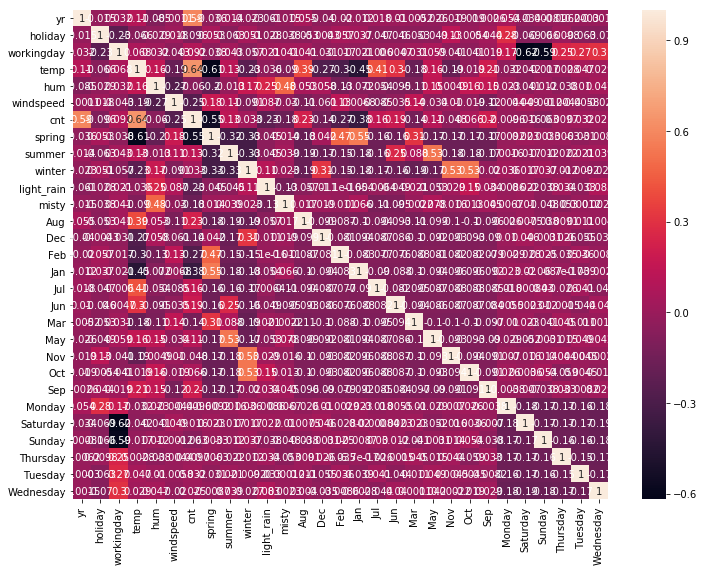

In [23]:
# plot the correlation between variables
plt.figure(figsize=(12,9))
res = df_train.corr()
sns.heatmap(res,annot=True)
plt.show()
# target variable cnt has high correlation with registered,casual,yr, and temp

In [24]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Models

In [25]:
#model 1 
# from the EDA we know that temparature has a linear relantionship with cnt
X_train_sm = sm.add_constant(X_train['temp'])
lr = sm.OLS(y_train,X_train_sm)

lr_model_1 = lr.fit()
lr_model_1.summary()

# r_squared is 0.414

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           5.80e-61
Time:                        17:54:04   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#model 2 
# from the EDA we know that number of bike rentals increases with each year
X_train_sm = sm.add_constant(X_train[['temp','yr']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_2 = lr.fit()
lr_model_2.summary()

# r_squared is 0.690

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          9.25e-130
Time:                        17:54:04   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df
# VIF of temp and registered are acceptable

,Features,VIF
0,const,7.255169
1,temp,1.011645
2,yr,1.011645


In [28]:
#model 3 
# from the EDA we know that in summer,winter and fall the demands are higher.
# fall has the highest demand
X_train_sm = sm.add_constant(X_train[['temp','yr','spring','summer','winter']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_3 = lr.fit()
lr_model_3.summary()

# r_squared is 0.744
# p value of summer is high, so it's insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     293.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          9.74e-147
Time:                        17:54:04   Log-Likelihood:                 386.38
No. Observations:                 510   AIC:                            -760.8
Df Residuals:                     504   BIC:                            -735.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1118      0.034      3.316      0.001       0.046       0.178
temp           0.5135      0.040     12.694      0.000       0.434       0.593
yr             0.2391      0.010     23.471      0.000       0.219       0.259
spring        -0.0812      0.025     -3.272      0.001      -0.130      -0.032
summer         0.0290      0.017      1.745      0.082      -0.004       0.062
winter         0.0690      0.020      3.428      0.001       0.029       0.108
==============================================================================
Omnibus:                      116.060   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.429
Skew:                          -1.072   Prob(JB):                     3.60e-76
Kurtosis:                       6.429   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

# spring has high VIF

,Features,VIF
0,const,44.535454
1,temp,3.262622
2,yr,1.015859
3,spring,4.443569
4,summer,1.998549
5,winter,2.963603


In [30]:
#model 4 
# Drop spring due to high VIF
# fall has the highest demand
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_4 = lr.fit()
lr_model_4.summary()

# r_squared is 0.739
#P values are acceptable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     357.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          9.55e-146
Time:                        17:54:04   Log-Likelihood:                 381.02
No. Observations:                 510   AIC:                            -752.0
Df Residuals:                     505   BIC:                            -730.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.015      0.869      0.385      -0.017       0.043
temp           0.6219      0.023     26.561      0.000       0.576       0.668
yr             0.2369      0.010     23.088      0.000       0.217       0.257
summer         0.0649      0.013      5.165      0.000       0.040       0.090
winter         0.1202      0.013      9.417      0.000       0.095       0.145
==============================================================================
Omnibus:                      103.300   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.371
Skew:                          -0.976   Prob(JB):                     8.85e-64
Kurtosis:                       6.140   Cond. No.                         7.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,9.049774
1,temp,1.072537
2,yr,1.011653
3,summer,1.123837
4,winter,1.170019


In [32]:
#model 5 
#  From EDA we know that on good weather the number of bike rentals is higher
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_5 = lr.fit()
lr_model_5.summary()

# r_squared is 0.799

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     333.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.31e-171
Time:                        17:54:04   Log-Likelihood:                 447.52
No. Observations:                 510   AIC:                            -881.0
Df Residuals:                     503   BIC:                            -851.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0527      0.014      3.721      0.000       0.025       0.081
temp           0.6074      0.021     29.376      0.000       0.567       0.648
yr             0.2309      0.009     25.540      0.000       0.213       0.249
summer         0.0686      0.011      6.193      0.000       0.047       0.090
winter         0.1340      0.011     11.877      0.000       0.112       0.156
light_rain    -0.2867      0.027    -10.615      0.000      -0.340      -0.234
misty         -0.0713      0.010     -7.436      0.000      -0.090      -0.052
==============================================================================
Omnibus:                       57.041   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.525
Skew:                          -0.602   Prob(JB):                     2.75e-29
Kurtosis:                       5.177   Cond. No.                         8.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,9.967722
1,temp,1.081338
2,yr,1.015241
3,summer,1.127214
4,winter,1.183520
5,light_rain,1.034598
6,misty,1.028933


In [34]:
#model 6 
# Adding workingday to the model. From EDA we know that on weekdays the number of bike ren
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty','workingday']])
lr = sm.OLS(y_train,X_train_sm)

lr_model_6 = lr.fit()
lr_model_6.summary()

# r_squared is 0.802


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     290.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.88e-172
Time:                        17:54:04   Log-Likelihood:                 451.34
No. Observations:                 510   AIC:                            -886.7
Df Residuals:                     502   BIC:                            -852.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0373      0.015      2.465      0.014       0.008       0.067
temp           0.6042      0.021     29.365      0.000       0.564       0.645
yr             0.2303      0.009     25.622      0.000       0.213       0.248
summer         0.0680      0.011      6.175      0.000       0.046       0.090
winter         0.1352      0.011     12.051      0.000       0.113       0.157
light_rain    -0.2894      0.027    -10.778      0.000      -0.342      -0.237
misty         -0.0726      0.010     -7.615      0.000      -0.091      -0.054
workingday     0.0264      0.010      2.753      0.006       0.008       0.045
==============================================================================
Omnibus:                       49.912   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.824
Skew:                          -0.497   Prob(JB):                     2.89e-28
Kurtosis:                       5.232   Cond. No.                         9.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,11.540246
1,temp,1.084790
2,yr,1.015997
3,summer,1.127688
4,winter,1.185249
5,light_rain,1.035989
6,misty,1.031586
7,workingday,1.011132


In [36]:
#model 7 
# Adding all the months
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']])
lr = sm.OLS(y_train,X_train_sm)
lr_model_7= lr.fit()
lr_model_7.summary()

# r_squared is 0.826
# Oct is highly insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     129.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.68e-173
Time:                        17:54:05   Log-Likelihood:                 485.02
No. Observations:                 510   AIC:                            -932.0
Df Residuals:                     491   BIC:                            -851.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1387      0.037      3.794      0.000       0.067       0.210
temp           0.4151      0.047      8.758      0.000       0.322       0.508
yr             0.2340      0.009     27.212      0.000       0.217       0.251
summer         0.0622      0.021      2.928      0.004       0.020       0.104
winter         0.1503      0.024      6.317      0.000       0.104       0.197
light_rain    -0.3023      0.026    -11.756      0.000      -0.353      -0.252
misty         -0.0806      0.009     -8.798      0.000      -0.099      -0.063
workingday     0.0253      0.009      2.781      0.006       0.007       0.043
Aug            0.0696      0.032      2.171      0.030       0.007       0.133
Dec           -0.0571      0.035     -1.616      0.107      -0.126       0.012
Feb           -0.0627      0.033     -1.912      0.056      -0.127       0.002
Jan           -0.0812      0.033     -2.440      0.015      -0.147      -0.016
Jul            0.0176      0.034      0.520      0.604      -0.049       0.084
Jun            0.0356      0.026      1.357      0.175      -0.016       0.087
Mar           -0.0087      0.025     -0.349      0.727      -0.058       0.040
May            0.0346      0.022      1.552      0.121      -0.009       0.078
Nov           -0.0619      0.039     -1.604      0.109      -0.138       0.014
Oct           -0.0082      0.038     -0.213      0.831      -0.083       0.067
Sep            0.1165      0.032      3.698      0.000       0.055       0.178
==============================================================================
Omnibus:                       78.396   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.397
Skew:                          -0.697   Prob(JB):                     5.73e-56
Kurtosis:                       6.167   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,75.032067
1,temp,6.424515
2,yr,1.037941
3,summer,4.690742
4,winter,5.946708
5,light_rain,1.060283
6,misty,1.063567
7,workingday,1.016910
8,Aug,5.019970
9,Dec,5.407453


In [38]:
#model 8 
# Adding humidity to the model

X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Sep']])

lr = sm.OLS(y_train,X_train_sm)
lr_model_8= lr.fit()
lr_model_8.summary()

# r_squared is 0.826
# march is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     137.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.44e-174
Time:                        17:54:05   Log-Likelihood:                 485.00
No. Observations:                 510   AIC:                            -934.0
Df Residuals:                     492   BIC:                            -857.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1348      0.032      4.237      0.000       0.072       0.197
temp           0.4150      0.047      8.765      0.000       0.322       0.508
yr             0.2341      0.009     27.296      0.000       0.217       0.251
summer         0.0647      0.018      3.664      0.000       0.030       0.099
winter         0.1471      0.019      7.916      0.000       0.111       0.184
light_rain    -0.3027      0.026    -11.818      0.000      -0.353      -0.252
misty         -0.0807      0.009     -8.825      0.000      -0.099      -0.063
workingday     0.0254      0.009      2.793      0.005       0.008       0.043
Aug            0.0734      0.027      2.750      0.006       0.021       0.126
Dec           -0.0511      0.021     -2.395      0.017      -0.093      -0.009
Feb           -0.0589      0.028     -2.138      0.033      -0.113      -0.005
Jan           -0.0774      0.028     -2.750      0.006      -0.133      -0.022
Jul            0.0214      0.029      0.742      0.458      -0.035       0.078
Jun            0.0378      0.024      1.567      0.118      -0.010       0.085
Mar           -0.0058      0.021     -0.278      0.781      -0.047       0.035
May            0.0359      0.021      1.673      0.095      -0.006       0.078
Nov           -0.0549      0.021     -2.672      0.008      -0.095      -0.015
Sep            0.1210      0.023      5.183      0.000       0.075       0.167
==============================================================================
Omnibus:                       79.142   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.729
Skew:                          -0.703   Prob(JB):                     1.08e-56
Kurtosis:                       6.186   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,57.020362
1,temp,6.424322
2,yr,1.034464
3,summer,3.250147
4,winter,3.635866
5,light_rain,1.054069
6,misty,1.061533
7,workingday,1.015776
8,Aug,3.483707
9,Dec,1.976816


In [40]:
#model 9 
# replacing workingday with yr.
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'May', 'Nov', 'Sep']])

lr = sm.OLS(y_train,X_train_sm)

lr_model_9 = lr.fit()
lr_model_9.summary()

# p value of july is high. So july is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     146.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.22e-175
Time:                        17:54:05   Log-Likelihood:                 484.96
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     493   BIC:                            -863.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1296      0.026      5.043      0.000       0.079       0.180
temp           0.4181      0.046      9.101      0.000       0.328       0.508
yr             0.2340      0.009     27.324      0.000       0.217       0.251
summer         0.0665      0.016      4.058      0.000       0.034       0.099
winter         0.1498      0.016      9.449      0.000       0.119       0.181
light_rain    -0.3025      0.026    -11.826      0.000      -0.353      -0.252
misty         -0.0808      0.009     -8.839      0.000      -0.099      -0.063
workingday     0.0252      0.009      2.786      0.006       0.007       0.043
Aug            0.0762      0.025      3.090      0.002       0.028       0.125
Dec           -0.0487      0.019     -2.497      0.013      -0.087      -0.010
Feb           -0.0545      0.022     -2.424      0.016      -0.099      -0.010
Jan           -0.0727      0.023     -3.222      0.001      -0.117      -0.028
Jul            0.0240      0.027      0.882      0.378      -0.030       0.078
Jun            0.0395      0.023      1.699      0.090      -0.006       0.085
May            0.0374      0.021      1.800      0.072      -0.003       0.078
Nov           -0.0535      0.020     -2.687      0.007      -0.093      -0.014
Sep            0.1236      0.021      5.764      0.000       0.081       0.166
==============================================================================
Omnibus:                       78.311   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.809
Skew:                          -0.700   Prob(JB):                     3.45e-55
Kurtosis:                       6.137   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,37.267169
1,temp,6.060303
2,yr,1.033786
3,summer,2.805629
4,winter,2.650700
5,light_rain,1.053466
6,misty,1.061235
7,workingday,1.013765
8,Aug,2.981248
9,Dec,1.654786


In [42]:
#model 10 
# removing july.
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
       'Jun', 'May', 'Nov', 'Sep']])

lr = sm.OLS(y_train,X_train_sm)

lr_model_10 = lr.fit()
lr_model_10.summary()

# p value of jun is high. So jun is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.41e-176
Time:                        17:54:05   Log-Likelihood:                 484.55
No. Observations:                 510   AIC:                            -937.1
Df Residuals:                     494   BIC:                            -869.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1233      0.025      4.997      0.000       0.075       0.172
temp           0.4453      0.034     13.053      0.000       0.378       0.512
yr             0.2334      0.009     27.350      0.000       0.217       0.250
summer         0.0617      0.015      3.994      0.000       0.031       0.092
winter         0.1445      0.015      9.861      0.000       0.116       0.173
light_rain    -0.3028      0.026    -11.840      0.000      -0.353      -0.253
misty         -0.0808      0.009     -8.845      0.000      -0.099      -0.063
workingday     0.0250      0.009      2.763      0.006       0.007       0.043
Aug            0.0613      0.018      3.419      0.001       0.026       0.096
Dec           -0.0472      0.019     -2.432      0.015      -0.085      -0.009
Feb           -0.0555      0.022     -2.471      0.014      -0.100      -0.011
Jan           -0.0717      0.023     -3.181      0.002      -0.116      -0.027
Jun            0.0283      0.019      1.453      0.147      -0.010       0.067
May            0.0314      0.020      1.599      0.110      -0.007       0.070
Nov           -0.0521      0.020     -2.624      0.009      -0.091      -0.013
Sep            0.1127      0.018      6.419      0.000       0.078       0.147
==============================================================================
Omnibus:                       75.832   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.220
Skew:                          -0.690   Prob(JB):                     2.27e-51
Kurtosis:                       6.012   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,34.330222
1,temp,3.342363
2,yr,1.026871
3,summer,2.491986
4,winter,2.264453
5,light_rain,1.053321
6,misty,1.061209
7,workingday,1.012989
8,Aug,1.574186
9,Dec,1.643059


In [44]:
#model 11 
# removing june.
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
        'May', 'Nov', 'Sep']])

lr = sm.OLS(y_train,X_train_sm)

lr_model_11 = lr.fit()
lr_model_11.summary()

# May is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.05e-177
Time:                        17:54:05   Log-Likelihood:                 483.47
No. Observations:                 510   AIC:                            -936.9
Df Residuals:                     495   BIC:                            -873.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1142      0.024      4.780      0.000       0.067       0.161
temp           0.4658      0.031     14.980      0.000       0.405       0.527
yr             0.2327      0.009     27.281      0.000       0.216       0.249
summer         0.0684      0.015      4.627      0.000       0.039       0.097
winter         0.1438      0.015      9.811      0.000       0.115       0.173
light_rain    -0.3042      0.026    -11.891      0.000      -0.354      -0.254
misty         -0.0813      0.009     -8.890      0.000      -0.099      -0.063
workingday     0.0250      0.009      2.756      0.006       0.007       0.043
Aug            0.0545      0.017      3.145      0.002       0.020       0.089
Dec           -0.0440      0.019     -2.278      0.023      -0.082      -0.006
Feb           -0.0517      0.022     -2.317      0.021      -0.096      -0.008
Jan           -0.0664      0.022     -2.982      0.003      -0.110      -0.023
May            0.0210      0.018      1.147      0.252      -0.015       0.057
Nov           -0.0499      0.020     -2.516      0.012      -0.089      -0.011
Sep            0.1084      0.017      6.256      0.000       0.074       0.142
==============================================================================
Omnibus:                       74.245   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.437
Skew:                          -0.693   Prob(JB):                     1.00e-47
Kurtosis:                       5.875   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,32.123793
1,temp,2.770606
2,yr,1.023415
3,summer,2.273217
4,winter,2.262382
5,light_rain,1.051776
6,misty,1.059968
7,workingday,1.012981
8,Aug,1.466670
9,Dec,1.621629


In [46]:
#model 12 
# removing may.
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
         'Nov', 'Sep']])

lr = sm.OLS(y_train,X_train_sm)

lr_model_12 = lr.fit()
lr_model_12.summary()

# May is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.29e-178
Time:                        17:54:05   Log-Likelihood:                 482.79
No. Observations:                 510   AIC:                            -937.6
Df Residuals:                     496   BIC:                            -878.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1098      0.024      4.655      0.000       0.063       0.156
temp           0.4721      0.031     15.427      0.000       0.412       0.532
yr             0.2321      0.009     27.252      0.000       0.215       0.249
summer         0.0759      0.013      5.746      0.000       0.050       0.102
winter         0.1444      0.015      9.857      0.000       0.116       0.173
light_rain    -0.3047      0.026    -11.909      0.000      -0.355      -0.254
misty         -0.0804      0.009     -8.825      0.000      -0.098      -0.063
workingday     0.0254      0.009      2.800      0.005       0.008       0.043
Aug            0.0535      0.017      3.091      0.002       0.019       0.087
Dec           -0.0425      0.019     -2.204      0.028      -0.080      -0.005
Feb           -0.0494      0.022     -2.221      0.027      -0.093      -0.006
Jan           -0.0637      0.022     -2.876      0.004      -0.107      -0.020
Nov           -0.0488      0.020     -2.466      0.014      -0.088      -0.010
Sep            0.1079      0.017      6.228      0.000       0.074       0.142
==============================================================================
Omnibus:                       72.558   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.105
Skew:                          -0.690   Prob(JB):                     7.88e-45
Kurtosis:                       5.766   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,31.306537
1,temp,2.682539
2,yr,1.019821
3,summer,1.818373
4,winter,2.259296
5,light_rain,1.051454
6,misty,1.053470
7,workingday,1.011563
8,Aug,1.462990
9,Dec,1.613903


In [48]:
#model 13 
# Adding hum
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
         'Nov', 'Sep','hum']])

lr = sm.OLS(y_train,X_train_sm)

lr_model_13 = lr.fit()
lr_model_13.summary()

# May is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.11e-178
Time:                        17:54:06   Log-Likelihood:                 485.54
No. Observations:                 510   AIC:                            -941.1
Df Residuals:                     495   BIC:                            -877.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1475      0.029      5.163      0.000       0.091       0.204
temp           0.4928      0.032     15.524      0.000       0.430       0.555
yr             0.2298      0.009     26.932      0.000       0.213       0.247
summer         0.0791      0.013      5.976      0.000       0.053       0.105
winter         0.1520      0.015     10.167      0.000       0.123       0.181
light_rain    -0.2815      0.027    -10.282      0.000      -0.335      -0.228
misty         -0.0662      0.011     -6.037      0.000      -0.088      -0.045
workingday     0.0253      0.009      2.805      0.005       0.008       0.043
Aug            0.0552      0.017      3.199      0.001       0.021       0.089
Dec           -0.0369      0.019     -1.909      0.057      -0.075       0.001
Feb           -0.0458      0.022     -2.062      0.040      -0.089      -0.002
Jan           -0.0562      0.022     -2.524      0.012      -0.100      -0.012
Nov           -0.0487      0.020     -2.470      0.014      -0.087      -0.010
Sep            0.1127      0.017      6.490      0.000       0.079       0.147
hum           -0.0888      0.038     -2.318      0.021      -0.164      -0.014
==============================================================================
Omnibus:                       71.007   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.884
Skew:                          -0.677   Prob(JB):                     1.07e-43
Kurtosis:                       5.735   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,46.328987
1,temp,2.911027
2,yr,1.033118
3,summer,1.837338
4,winter,2.370761
5,light_rain,1.214198
6,misty,1.537286
7,workingday,1.011574
8,Aug,1.465584
9,Dec,1.639057


In [50]:
#model 14 
# Adding hum
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
         'Nov', 'Sep','hum','windspeed']])

lr = sm.OLS(y_train,X_train_sm)

lr_model_14 = lr.fit()
lr_model_14.summary()

# p values are acceptable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.73e-188
Time:                        17:54:06   Log-Likelihood:                 512.22
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     494   BIC:                            -924.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2719      0.032      8.511      0.000       0.209       0.335
temp           0.4654      0.030     15.317      0.000       0.406       0.525
yr             0.2299      0.008     28.362      0.000       0.214       0.246
summer         0.0824      0.013      6.555      0.000       0.058       0.107
winter         0.1445      0.014     10.149      0.000       0.117       0.172
light_rain    -0.2462      0.026     -9.310      0.000      -0.298      -0.194
misty         -0.0560      0.011     -5.335      0.000      -0.077      -0.035
workingday     0.0226      0.009      2.632      0.009       0.006       0.039
Aug            0.0499      0.016      3.046      0.002       0.018       0.082
Dec           -0.0461      0.018     -2.506      0.013      -0.082      -0.010
Feb           -0.0458      0.021     -2.170      0.030      -0.087      -0.004
Jan           -0.0711      0.021     -3.345      0.001      -0.113      -0.029
Nov           -0.0486      0.019     -2.596      0.010      -0.085      -0.012
Sep            0.1054      0.017      6.372      0.000       0.073       0.138
hum           -0.1613      0.038     -4.280      0.000      -0.235      -0.087
windspeed     -0.1902      0.026     -7.381      0.000      -0.241      -0.140
==============================================================================
Omnibus:                       73.957   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.965
Skew:                          -0.699   Prob(JB):                     2.55e-46
Kurtosis:                       5.816   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif_df = pd.DataFrame()

vif_df['Features']=X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,const,64.190540
1,temp,2.955126
2,yr,1.033122
3,summer,1.839760
4,winter,2.382850
5,light_rain,1.255278
6,misty,1.564025
7,workingday,1.013454
8,Aug,1.468307
9,Dec,1.646639


## Residual analysis and prediction

### Assumptions of Linear Regression

- There should be a linear relationship between predictor variables X and target variable y
-  residual error terms should follow a normal distribution, with mean error at 0.
-  The Error terms are independent of each other
-  Error terms should have a constant variance

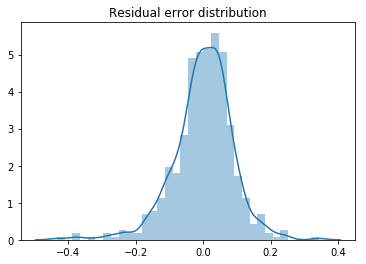

In [52]:
#model 13 is the best so far. Model 14 will be used for prediction
X_train_sm = sm.add_constant(X_train[['temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
         'Nov', 'Sep','hum','windspeed']])

y_train_pred=lr_model_14.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)
plt.title("Residual error distribution")
plt.show()

# error terms follow normal distribution

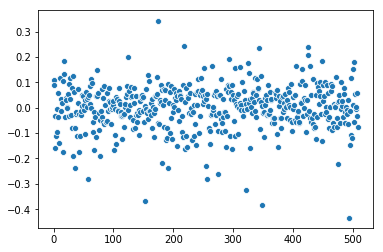

In [53]:
index = np.arange(y_train.shape[0])
sns.scatterplot(index,res)
plt.show()

# the error terms are randomly scattered. Error terms are independent on each other
#We can find that many error terms are closing in on 0. Therefore mean is 0


In [54]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_true=y_train,y_pred=y_train_pred)
r_squared

0.843964841334178

In [55]:
# rescaling of test data
var_list =['temp','hum','windspeed','cnt']
df_test[var_list]=scaler.transform(df_test[var_list])
df_test.head()

C:\Users\Rakshu\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rakshu\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
y_test = df_test.pop('cnt')
X_test = df_test

In [57]:
# prediction with model 8 
imp_var_list=['temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
         'Nov', 'Sep','hum','windspeed']
X_test_sm = sm.add_constant(X_test[imp_var_list])
y_test_pred = lr_model_14.predict(X_test_sm)
res = y_test - y_test_pred

In [58]:
r_squared = r2_score(y_true=y_test,y_pred=y_test_pred)
r_squared

# r_squared of test is 0.813,whereas r_squared of train is 0.84. The model is pretty good.

0.8138968186930309

## Conclusion

The important features which affect the demand of bike renting are:

``'temp','yr','summer','winter','light_rain','misty','workingday','Aug', 'Dec', 'Feb', 'Jan',
         'Nov', 'Sep','hum','windspeed'
  ``       
    